In [1]:
import numpy as np
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

# 21BCE2067 Kshitiz Bhargava

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# 21BCE2067 Kshitiz Bhargava

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 21BCE2067 Kshitiz Bhargava

In [4]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 21BCE2067 Kshitiz Bhargava

In [5]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5035 - accuracy: 0.8152 - val_loss: 0.4159 - val_accuracy: 0.8445
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3259 - accuracy: 0.8816 - val_loss: 0.3269 - val_accuracy: 0.8814
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2805 - accuracy: 0.8967 - val_loss: 0.2958 - val_accuracy: 0.8899
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2502 - accuracy: 0.9074 - val_loss: 0.2917 - val_accuracy: 0.8925
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2276 - accuracy: 0.9163 - val_loss: 0.2785 - val_accuracy: 0.9009
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2072 - accuracy: 0.9232 - val_loss: 0.2667 - val_accuracy: 0.9018
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1894 - accuracy: 0.9289 - val_loss: 0.2847 - val_ac

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# 21BCE2067 Kshitiz Bhargava

313/313 - 1s - loss: 0.2836 - accuracy: 0.9069 - 1s/epoch - 4ms/step

Test accuracy: 0.9068999886512756


In [7]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


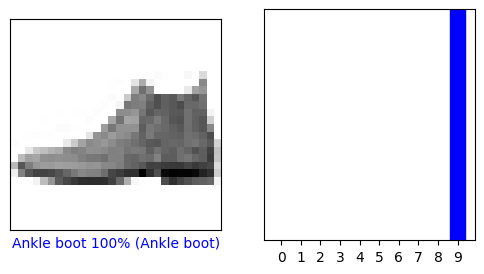

In [9]:
# Define class names
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Assuming predictions and other necessary data are available
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Example usage
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

# 21BCE2067 Kshitiz Bhargava